In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

In [4]:
model= np.polyfit(x, y, 1)

In [5]:
model

array([ 0.64383562, 26.78082192])

In [6]:
predict = np.poly1d(model)
predict(65)

np.float64(68.63013698630135)

In [7]:
y_pred= predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [8]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.4803218090889323

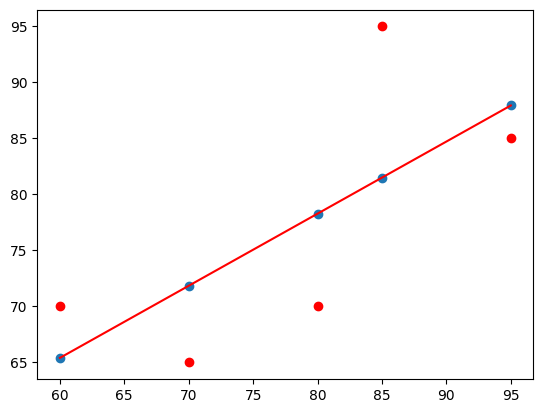

In [9]:
y_line = model[1] + model[0]* x
plt.plot(x, y_line, c = 'r')
plt.scatter(x, y_pred)
plt.scatter(x,y,c='r')

In [20]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [21]:
data = pd.DataFrame(california.data)

In [22]:
data.columns = california.feature_names
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
data['PRICE'] = california.target

In [24]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [25]:
x = data.drop(['PRICE'], axis=1)
y = data['PRICE']

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)


In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain, ytrain)

In [28]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [29]:
df_train = pd.DataFrame({'True': ytrain, 'Predicted': ytrain_pred})
df_test = pd.DataFrame({'True': ytest, 'Predicted': ytest_pred})

In [30]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain, ytrain_pred)
print("Mean Squared Error (Train):", mse_train)

Mean Squared Error (Train): 0.5234413607125448


In [31]:
mse_test = mean_squared_error(ytest, ytest_pred)
print("Mean Squared Error (Test):", mse_test)

Mean Squared Error (Test): 0.5289841670367209


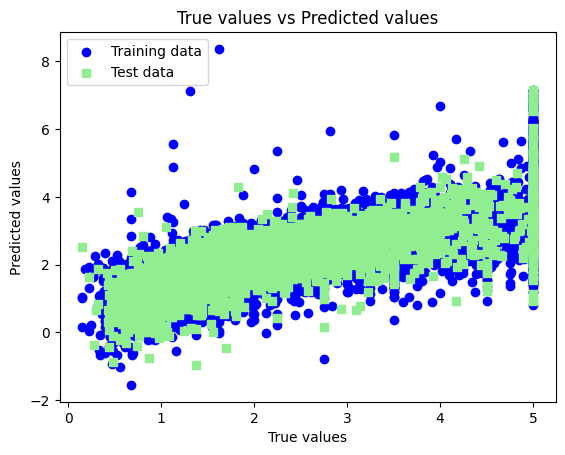

In [32]:
plt.scatter(ytrain, ytrain_pred, c='blue', marker='o', label='Training data')
plt.scatter(ytest, ytest_pred, c='lightgreen', marker='s', label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True values vs Predicted values')
plt.legend(loc='upper left')
plt.show()